<a href="https://colab.research.google.com/github/7PAM2015-0509-2023TEAM1/Kaggle-Challenge/blob/main/Kaggle_Challenge_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
!pip install shap

In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import shap
from shap.maskers import Independent
from shap import Explainer, TreeExplainer, Explanation

##Data Reading and Preprocessing



In [92]:
df = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023TEAM1/Kaggle-Challenge/main/train.csv")


In [93]:
df_test = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023TEAM1/Kaggle-Challenge/main/test.csv")

In [94]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [95]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [96]:
df.shape

(8693, 14)

In [97]:
# checking null values
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [98]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [99]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [100]:
#seperate the categorical data from the numerical dataset
cat_col=df.select_dtypes(include=['object']).columns
df_train_cat=df[cat_col]
print(df_train_cat.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  False   

                Name  
0    Maham Ofracculy  
1       Juanna Vines  
2      Altark Susent  
3       Solam Susent  
4  Willy Santantines  


In [101]:
for columns in df_train_cat.columns:
    df_train_cat[columns].fillna(df_train_cat[columns].mode()[0],inplace=True)

<ipython-input-101-fc5f93766abc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cat[columns].fillna(df_train_cat[columns].mode()[0],inplace=True)


In [102]:
df_train_cat.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
dtype: int64

In [103]:
# start check the columns which contains the numerical values
num_col=df.select_dtypes(include=['float64']).columns
df_train_num = df[num_col]
print(df_train_num.head())

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  39.0          0.0        0.0           0.0     0.0     0.0
1  24.0        109.0        9.0          25.0   549.0    44.0
2  58.0         43.0     3576.0           0.0  6715.0    49.0
3  33.0          0.0     1283.0         371.0  3329.0   193.0
4  16.0        303.0       70.0         151.0   565.0     2.0


In [104]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train_num),columns=df_train_num.columns)

In [105]:
df_train_imputed.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [106]:
df_train = pd.concat([df_train_cat,df_train_imputed,df['Transported']],axis=1)

In [107]:
print(df_train.head())

  PassengerId HomePlanet  CryoSleep  Cabin  Destination    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  False   

                Name   Age  RoomService  FoodCourt  ShoppingMall     Spa  \
0    Maham Ofracculy  39.0          0.0        0.0           0.0     0.0   
1       Juanna Vines  24.0        109.0        9.0          25.0   549.0   
2      Altark Susent  58.0         43.0     3576.0           0.0  6715.0   
3       Solam Susent  33.0          0.0     1283.0         371.0  3329.0   
4  Willy Santantines  16.0        303.0       70.0         151.0   565.0   

   VRDeck  Transported  
0     0.0        False  
1    44.0         True  
2    49.0        False  
3   193.0        False  
4     2.0         Tru

In [108]:
print(df_train.shape)

(8693, 14)


In [109]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
VIP                bool
Name             object
Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [110]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported'],
      dtype='object')

In [111]:
df_test.shape

(4277, 13)

In [112]:
# do the same tranformation with test data set
cat_col_test=df_test.select_dtypes(include=['object']).columns
df_train_cat_test=df_test[cat_col_test]
print(df_train_cat_test.head())

for columns in df_train_cat_test.columns:
    df_train_cat_test[columns].fillna(df_train_cat_test[columns].mode()[0],inplace=True)

df_train_cat_test.isnull().sum()

  PassengerId HomePlanet CryoSleep  Cabin  Destination    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  False   

               Name  
0   Nelly Carsoning  
1    Lerome Peckers  
2   Sabih Unhearfus  
3  Meratz Caltilter  
4   Brence Harperez  


<ipython-input-112-fe664c77eebb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cat_test[columns].fillna(df_train_cat_test[columns].mode()[0],inplace=True)


PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
dtype: int64

In [113]:

# start check the columns which contains the numerical values
num_col_test=df_test.select_dtypes(include=['float64']).columns
df_train_num_test = df_test[num_col_test]
print(df_train_num_test.head())

imputer_test = KNNImputer(n_neighbors=5)
df_train_imputed_test = pd.DataFrame(imputer.fit_transform(df_train_num_test),columns=df_train_num_test.columns)

df_train_imputed_test.isnull().sum()

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  27.0          0.0        0.0           0.0     0.0     0.0
1  19.0          0.0        9.0           0.0  2823.0     0.0
2  31.0          0.0        0.0           0.0     0.0     0.0
3  38.0          0.0     6652.0           0.0   181.0   585.0
4  20.0         10.0        0.0         635.0     0.0     0.0


Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [114]:
df_test_transform = pd.concat([df_train_cat_test,df_train_imputed_test],axis=1)
print(df_test_transform.shape)

(4277, 13)


In [115]:
df_test_transform.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Name            0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [116]:
# dropping columns since the PassengerId, Name and Cabin won't be effective in prediction
# as these are just ids
df_new = df_train.drop(columns=['PassengerId', 'Name', 'Cabin'])

In [117]:
df_new.shape

(8693, 11)

In [118]:
#drop the same rows from test set as well
df_test_transform = df_test_transform.drop(columns=['PassengerId', 'Name', 'Cabin'])

In [119]:
df_test_transform.shape

(4277, 10)

#**Data Visualization**

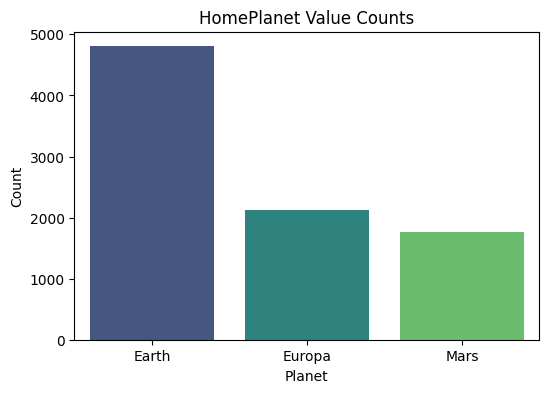

In [120]:
# Count the frequency of each value
count_data = df_new['HomePlanet'].value_counts().reset_index()
count_data.columns = ['HomePlanet', 'Count']

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='HomePlanet', y='Count', data=count_data, palette='viridis', hue='HomePlanet')

# Add labels and title
plt.xlabel('Planet')
plt.ylabel('Count')
plt.title('HomePlanet Value Counts')

# Show the plot
plt.show()

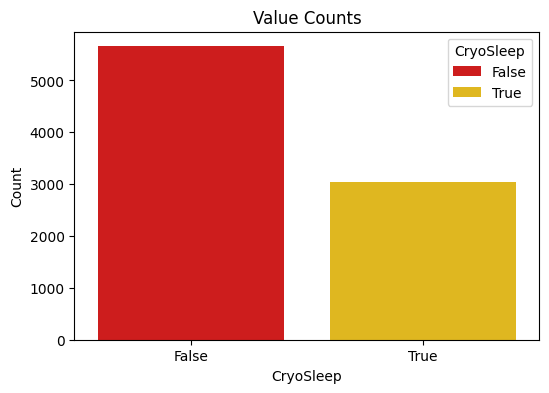

In [121]:
# Count the frequency of each value
count_data = df_new['CryoSleep'].value_counts().reset_index()
count_data.columns = ['CryoSleep', 'Count']

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='CryoSleep', y='Count', data=count_data, palette='hot', hue='CryoSleep')

# Add labels and title
plt.ylabel('Count')
plt.title('Value Counts')

# Show the plot
plt.show()

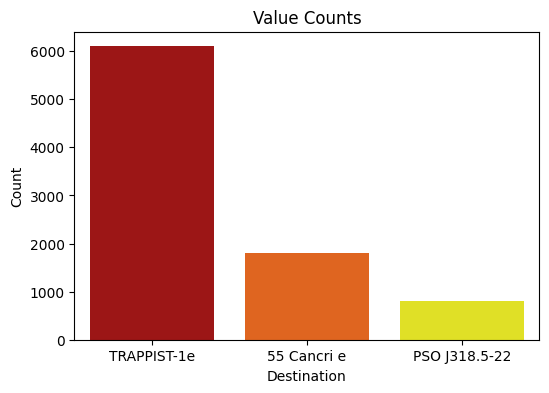

In [122]:
# Count the frequency of each value
count_data = df_new['Destination'].value_counts().reset_index()
count_data.columns = ['Destination', 'Count']

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Destination', y='Count', data=count_data, palette='hot', hue='Destination')

# Add labels and title
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Value Counts')

# Show the plot
plt.show()

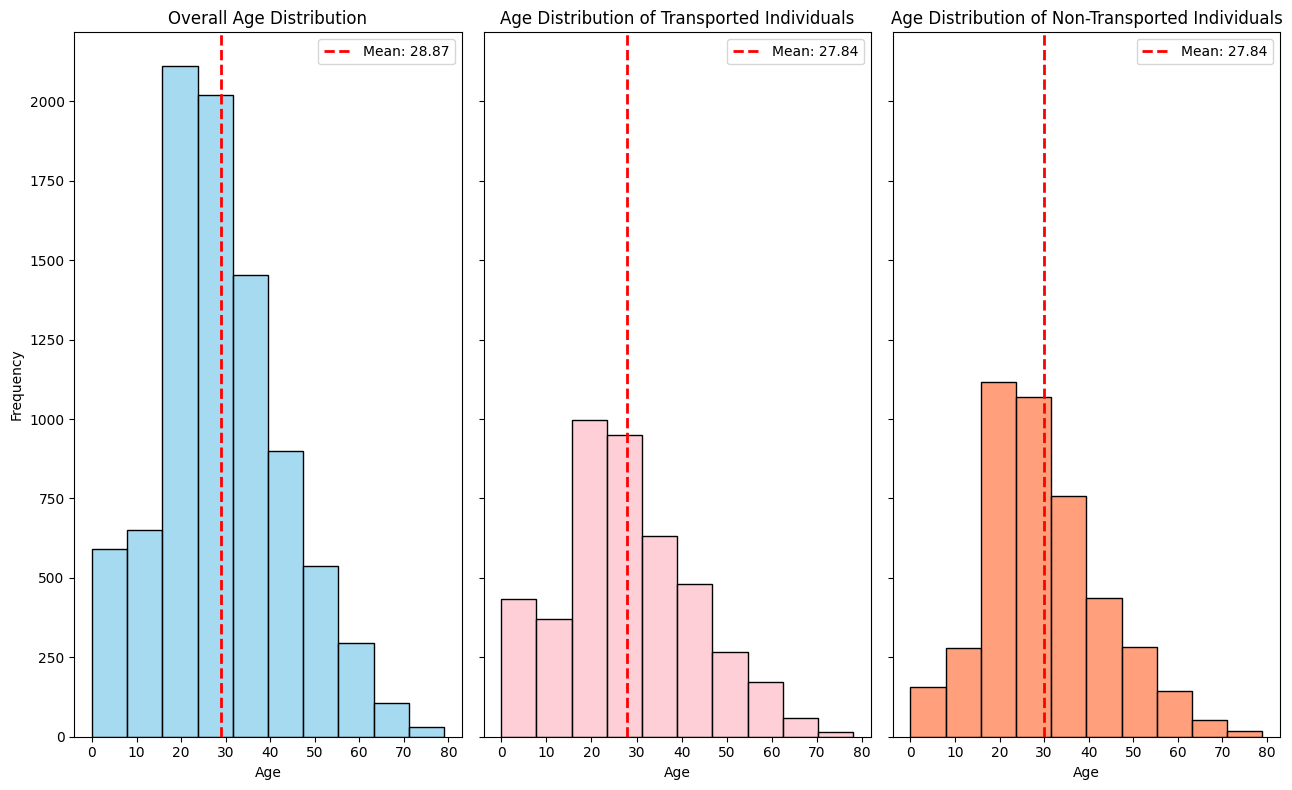

In [123]:
# Filter the DataFrame for rows where 'Transported' is True
df_transported = df_new[df_new['Transported'] == True]
df_non_transported = df_new[df_new['Transported'] == False]

# Calculate the mean of the 'age' column
mean_age = df_new['Age'].mean()

# Calculate the mean of the 'age' column for transported individuals
mean_age_transported = df_transported['Age'].mean()
mean_age_non_transported = df_non_transported['Age'].mean()

# Create side-by-side plots
# fig, axes = plt.subplots(1, 2, figsize=(13, 8), sharey=True)
fig, axes = plt.subplots(1, 3, figsize=(13, 8), sharey=True)

# Overall age distribution
sns.histplot(df_new['Age'], bins=10, kde=False, color='skyblue', ax=axes[0])
axes[0].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Overall Age Distribution')
axes[0].legend()

# Age distribution of transported individuals
sns.histplot(df_transported['Age'], bins=10, kde=False, color='pink', ax=axes[1])
axes[1].axvline(mean_age_transported, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age_transported:.2f}')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Age Distribution of Transported Individuals')
axes[1].legend()

# Age distribution of transported individuals
sns.histplot(df_non_transported['Age'], bins=10, kde=False, color='coral', ax=axes[2])
axes[2].axvline(mean_age_non_transported, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age_transported:.2f}')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Age Distribution of Non-Transported Individuals')
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

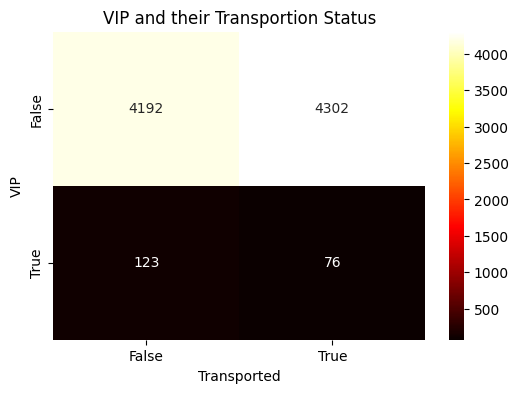

In [124]:
# Create a confusion matrix-like DataFrame
conf_matrix = pd.crosstab(df_new['VIP'], df_new['Transported'], rownames=['VIP'], colnames=['Transported'])

# Plot the confusion matrix-style DataFrame using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='hot')

# Add labels and title
plt.xlabel('Transported')
plt.ylabel('VIP')
plt.title('VIP and their Transportion Status')

# Show the plot
plt.show()

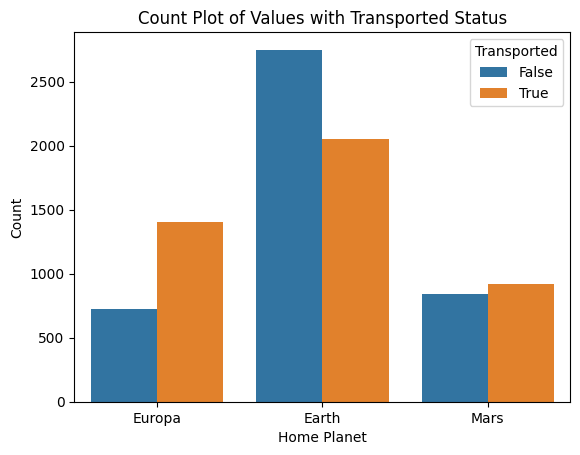

In [125]:
sns.countplot(data=df_new, x='HomePlanet', hue='Transported')

plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.title('Count Plot of Values with Transported Status')

# Show the plot
plt.show()

In [126]:
df_new.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

# Data Encoding

In [127]:
# here "Transported" is the variable to be predicted

In [128]:
def encoder(column):
    mapper = {}
    count = 0
    for value in column:
        if value not in mapper:
            mapper[value] = count
            count += 1
    return mapper

def map_column(column, mapper):
    return [mapper[value] for value in column]


columns = ["HomePlanet","CryoSleep","Destination","VIP","Transported"]
for i in columns:
    mapper = encoder(df[i])
    if i == 'Transported':
        print(mapper)
    df_new[i] = map_column(df[i].tolist(), mapper)
    if i!="Transported":
        df_test_transform[i] = map_column(df_test_transform[i].tolist(), mapper)

{False: 0, True: 1}


In [129]:
df_new

,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0,0,0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,0,24.0,109.0,9.0,25.0,549.0,44.0,1
2,0,0,0,1,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0,0,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,1,0,0,0,16.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0,2,1,41.0,0.0,6819.0,0.0,1643.0,74.0,0
8689,1,1,1,0,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,1,0,0,0,26.0,0.0,0.0,1872.0,1.0,0.0,1
8691,0,0,2,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0


In [130]:
df_test_transform

,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,27.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,19.0,0.0,9.0,0.0,2823.0,0.0
2,0,1,2,0,31.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,38.0,0.0,6652.0,0.0,181.0,585.0
4,1,0,0,0,20.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,1,1,0,0,34.0,0.0,0.0,0.0,0.0,0.0
4273,1,0,0,0,42.0,0.0,847.0,17.0,10.0,144.0
4274,2,1,2,0,9.4,0.0,0.0,0.0,0.0,0.0
4275,0,0,0,0,29.0,0.0,2680.0,0.0,0.0,523.0


## Plotting Boxplot to See the Deviations


<Axes: ylabel='Age'>

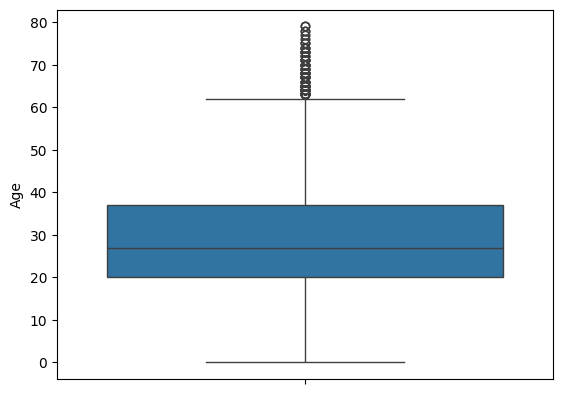

In [131]:
import seaborn as sns
sns.boxplot(df_new['Age'])

<Axes: ylabel='RoomService'>

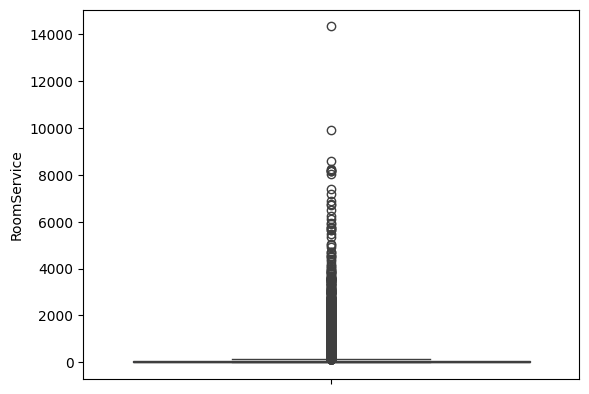

In [132]:
sns.boxplot(df_new['RoomService'])

<Axes: ylabel='FoodCourt'>

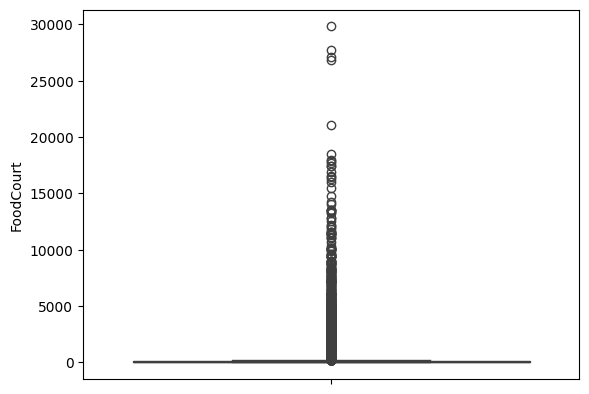

In [133]:
sns.boxplot(df_new['FoodCourt'])

<Axes: ylabel='ShoppingMall'>

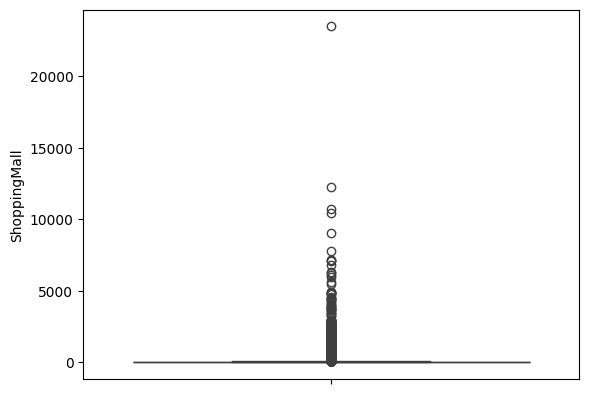

In [134]:
sns.boxplot(df_new['ShoppingMall'])

<Axes: ylabel='Spa'>

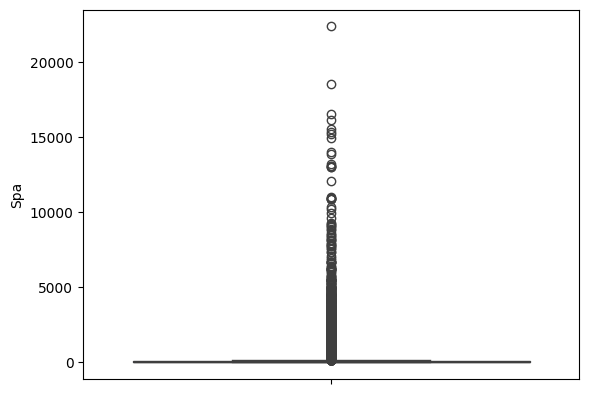

In [135]:
sns.boxplot(df_new['Spa'])

<Axes: ylabel='VRDeck'>

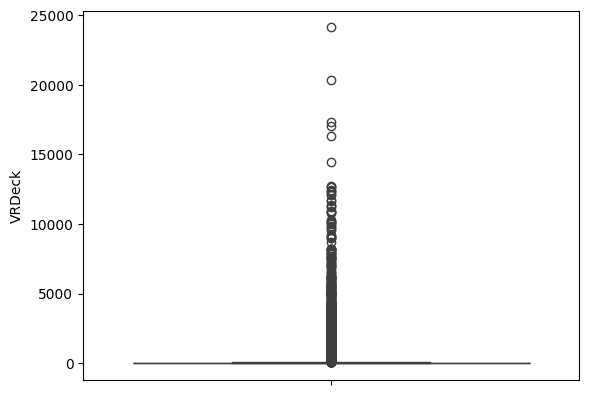

In [136]:

sns.boxplot(df_new['VRDeck'])

# Algorithm Implementations

Now we will apply all different techniques which can be used to increase the accuracy. It is important to note that we will apply the steps in each method separately depending upon the need

In [137]:
techniques = []

## Training a random forest

In [138]:
X = df_new.drop('Transported', axis=1)
y = df_new['Transported']


X_test = df_test_transform[list(X.columns)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

f1 = f1_score(y_valid, y_pred, average='binary')
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

techniques.append(['Random Forest', f1])

# prediction on X_test
test_predictions = model.predict(X_test)

# Applying the mapping to the predictions
transported_predictions = pd.Series(test_predictions).map({0:False, 1:True})

# Creating a new DataFrame with PassengerId and Transported columns
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
}).reset_index(drop=True)

# Ensuring the lengths match and there are no index mismatches
assert len(result_df) == len(df_test), "The length of the result_df does not match the length of df_test."

# Saving the new DataFrame to a CSV file
result_df.to_csv('random_forest_predictions.csv', index=False)

F1 Score: 0.7870680044593087
Confusion Matrix:
 [[ 976  313]
 [ 260 1059]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1289
           1       0.77      0.80      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [139]:
transported_predictions

0        True
1       False
2        True
3        True
4       False
        ...  
4272     True
4273    False
4274     True
4275     True
4276    False
Length: 4277, dtype: bool

## Feature Engineering on Top 7 Features

F1 Score: 0.7937203358890105
Confusion Matrix:
 [[ 956  333]
 [ 232 1087]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1289
           1       0.77      0.82      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



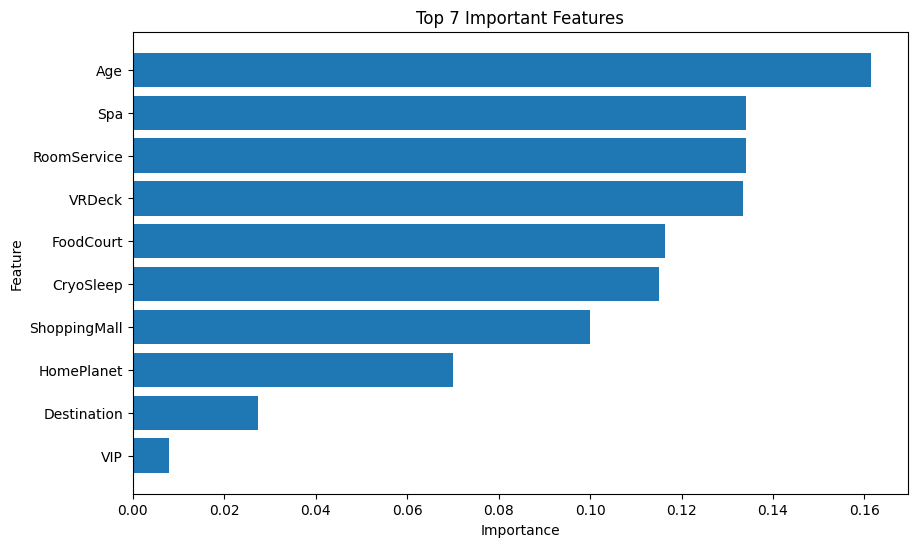

In [140]:
# Assuming df_new is your DataFrame and 'Transported' is the target column
X = df_new.drop('Transported', axis=1)
y = df_new['Transported']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance and select the top 7 features
top_n = 7
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)['Feature']

# Use only the top 7 features for training and testing
X_top = X[top_features]

# Split the dataset into training and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier_top = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier_top.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier_top.predict(X_valid)

# Evaluate the model
f1 = f1_score(y_valid, y_pred, average='binary')
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df.sort_values(by='Importance', ascending=True)['Feature'],
         feature_importance_df.sort_values(by='Importance', ascending=True)['Importance']
         )
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Important Features')
plt.show()

techniques.append(['Top Features', f1])

# prediction on X_test
X_test = X_test[top_features]
test_predictions = rf_classifier_top.predict(X_test)

# Applying the mapping to the predictions
transported_predictions = pd.Series(test_predictions).map({0:False, 1:True})

result_df = None
# Creating a new DataFrame with PassengerId and Transported columns
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
})

# Saving the new DataFrame to a CSV file
result_df.to_csv('top_features_random_forest.csv', index=False)

## Applying k-Fold validation

K-fold cross-validation is a widely used technique in machine learning for assessing model performance. It involves dividing the dataset into k subsets, or folds, where the model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, with each fold serving as the validation set exactly once. K-fold cross-validation helps to mitigate overfitting by providing a more reliable estimate of the model's performance across different subsets of data, thus improving its generalizability to unseen data.

In [141]:
# Assuming df_new is your DataFrame and 'Transported' is the target column

X = df_new.drop('Transported', axis=1)
y = df_new['Transported']

# Initialize the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf, scoring='f1')

# Output the scores
mean_f1_score = scores.mean()
print(f"F1 Score: {mean_f1_score}")

techniques.append(['k-Fold', mean_f1_score])

# Train the model on the entire dataset
clf.fit(X, y)
X_test = df_test_transform[list(X.columns)]
test_predictions = clf.predict(X_test)
transported_predictions = pd.Series(test_predictions).map({0: False, 1: True})
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
})

# Saving the new DataFrame to a CSV file
result_df.to_csv('random_forest_kfold_predictions.csv', index=False)

F1 Score: 0.7912316297725085
